In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [12]:
sigungu = pd.read_csv(path+'sigungu_imp_10.csv', encoding='cp949')
sigungu_3 = pd.read_csv(path+'시군구별지역안전지표_2015.csv', encoding='cp949')

In [13]:
y_bin = sigungu.iloc[:,-7:]    #등급(binary)
y_deci = sigungu_3.iloc[:,-7:] #등급(1-5)
X = sigungu.iloc[:,4:-7]       #독립변수X
name = sigungu.iloc[:,:4]      #이름

In [14]:
y_bin.columns = ['fire','transport','disaster','crime','accident','suicide','infection']

# 표준화
<pre>
표준화하지 않고 그래프를 그립니다.
그래프를 직관적으로 해석하기 위함입니다.
예로,
이혼건수 : (scale된 지표) 0.5보다는
이혼건수 : (만명당) 20건이 더 직관적입니다.
</pre>

In [15]:
####
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0,1))
# Xscaled = scaler.fit_transform(X)

In [16]:
####
# Xscaled = pd.DataFrame(data = Xscaled)
# Xscaled.columns = X.columns
# Xscaled.shape

In [17]:
####
# sigungu_xy = pd.concat([Xscaled,y_bin], axis=1)
sigungu_xy = pd.concat([X,y_bin], axis=1)
sigungu_nxy = pd.concat([name, sigungu_xy], axis=1) #스케일링, 바이너리등급 완료된 전체df

## 중앙선그리는 함수 선언
scatter(x="이혼건수", y="5대범죄 발생건수", color="crime", df=sigungu_nxy, medianline=1, text=1, palette='picnic', hovername='지역')

In [18]:
import plotly.express as px
import plotly.graph_objects as go
def scatter(x, y, color, df, hovername=None,text=False, medianline=False, palette='fall', trendline=None):
    if text == True:
        fig = px.scatter(df, x=x, y=y, text='시군구',trendline=trendline,
                         hover_name=hovername, color=color, color_continuous_scale=palette)
        fig.update_traces(textposition='top center')
    else:
        fig = px.scatter(df, x=x, y=y,trendline=trendline,
                         hover_name=hovername, color=color, color_continuous_scale=palette)
        fig.update_traces(textposition='top center')
    if medianline==True:
        #x축 중앙값 그리기
        fig.add_trace(
            go.Scatter(x=[df[x].median()]*2,
                       y=[-10000,10000],
                       name="median x: "+str(round(df[x].median(),2)),
                       mode="lines",
                       line = dict(color = ('rgb(0,0,0)'),width=0.5),
                       visible=True,
                      ))

    #y축 중앙값 그리기
        fig.add_trace(
            go.Scatter(x=[-10000,10000],
                       y=[df[y].median()]*2,
                       name="median y: "+str(round(df[y].median(),2)),
                       mode="lines",
                       line = dict(color = ('rgb(0,0,0)'),width=0.5),
                       visible=True
                      ))
        fig.update_layout(legend=dict(x=-.05, y=1.15))

    #플롯 레이아웃(x범위, y범위) 설정
    fig.update_xaxes(range=[df[x].min()*0.8, df[x].max()*1.05]) #min값 음수인지 아닌지 확인 후 범위 조절
    fig.update_yaxes(range=[df[y].min()*0.5, df[y].max()*1.05]) #min값 음수인지 아닌지 확인 후 범위 조절

    fig.show()

# describe로 평균 확인

In [19]:
#평균확인
sigungu_nxy.describe()

,년도,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,fire,transport,disaster,crime,accident,suicide,infection
count,226.0,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02,226.000000,226.000000,226.000000,2.260000e+02,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,2015.0,941.597024,102.764002,0.042113,0.123374,27.316111,2.051725,1.650232e+06,31.173721,230.522573,0.146283,0.968136,1779.586365,78.171753,0.033539,76.906028,198.344145,327.137746,1.495169,0.106270,0.015917,1.591732,38.537276,55.001281,3.733061,16.464005,0.411704,339.874237,117.734425,29.705906,0.707615,0.062158,6.215773,3909.658036,0.522805,52.280477,446.227735,46.429250,56.676314,3.799892,0.272215,1.445780,0.974456,0.352732,0.214320,0.039885,46.130150,52.347425,133.563661,281.682769,15.605989,1758.014456,252.650528,0.609380,259.889754,98.577390,0.022629,5.902637,5.734045,27.460177,20.128938,440.002137,926.532635,524.578256,401.954379,2.469469,9056.890883,44.601327,22.418074,0.019988,95.680369,136.402208,202.697119,6.292478,75.438496,59.732743,0.011061,1.106138,109.647098,145.858325,380.870832,46.429250,17.531229,339.992365,245.028245,248.346896,6.755419e+06,0.386653,22.047558,

## 가설: 이혼부모 + 미성년자녀 가구가 많은 지역은 소년범죄율이 높을 것이다.
## 재판이혼이 많은 지역은 범죄가 많을 것이다.
## 재판이혼이 많은 지역은 소년범죄가 많을 것이다
# 가설검증의 단계

### 1. 가설검증의 대상이 되는 집단을 그룹화

In [39]:
#2)데이터프레임의 새로운 열을 만들어 타겟팅 그룹을 구분한다.
#1사분면의 모든 주황초록점 : group1, 1사분면 주황점: group2
sigungu_nxy['group1'] = np.zeros(len(sigungu_nxy))
sigungu_nxy['group2'] = np.zeros(len(sigungu_nxy))
#조건을 만족하는 행 인덱스 가져오기
cond = (sigungu_nxy['제조업 업체수']>sigungu_nxy['제조업 업체수'].median())&((sigungu_nxy['제조업 종사자수']>sigungu_nxy['제조업 종사자수'].median()))
group1_index = sigungu_nxy.loc[cond].index
group2_index = sigungu_nxy.loc[cond&sigungu_nxy.transport==1].index
#group1에 속하는 애들을 1로 표시
sigungu_nxy.loc[sigungu_nxy.index.isin(group1_index),'group1'] = 1
sigungu_nxy.loc[sigungu_nxy.index.isin(group2_index),'group2'] = 1

### 2. 가설검증에 필요한 지표를 새로운 열로 추가
외부데이터수집, 데이터변형, 데이터프레임화

In [40]:
#음주사고비율 추가(음주교통사고/일반교통사고)
sigungu_nxy['음주교통사고 발생비율'] = sigungu_nxy['음주교통사고 발생건수']/sigungu_nxy['교통사고 발생건수']

In [41]:
#추가된 열(음주교통사고 발생비율) 확인
sigungu_nxy.head(1)

,년도,시도,시군구,지역,1인가구수,5대범죄 발생건수,가스사고발생건수,가해(타살) 사망자수,감염병 발생건수,감염병 사망자수,건강보험급여실적,건설업 업체수,건설업 종사자수,건축용지 면적,경찰관서수,고령인구수,공무원수(정원),공업지역 면적,교통문화지수,교통사고 발생건수,교통사고 부상자수,교통사고 사망자수,교통사고사망자수(고속도로),구거면적,구거면적 비율,구급발생건수,구조구급 발생건수,구조구급대원수,구조발생건수,급경사지 붕괴위험지구 수,기초수급자수,기초수급자수(65세이상),노인 교통사고 부상자수,노인 교통사고 사망자수,도로면적,도로면적 비율,도로연장,도시지역 면적,도시지역 면적 비율,독거노인수,무면허교통사고 발생건수,반지하가구 수,범죄발생건수(강간.강제추행),범죄발생건수(강도),범죄발생건수(도박),범죄발생건수(마약),범죄발생건수(방화),범죄발생건수(살인),범죄발생건수(약취.유인),범죄발생건수(절도),범죄발생건수(폭력),병상수,보건업 및 사회복지서비스업 종사자수,보행사상자수,보행자전용·우선도로 면적,보행자전용·우선도로 연장,비닐하우스 면적,빈집수,산사태위험지역 면적,상업지역 면적,수계밀도,순이동자수,스트레스인지율,시가화율,시군구내 전입자수,시군구외 전입자수,시도간 전입자수,시도내-시군구간 전입자수,실업률,야간인구수,양호한 주관적 건강수준 인지율,어린이 교통사고 부상자수,어린이 교통사고 사망자수,어린이 아토피,어린이 천식,외국인수,우울감경험률,운전시 안전벨트 착용률,월간음주율,유지면적,유지면적 비율,유치원생수,음식점 및 주점업 업체수,음식점 및 주점업 종사자수,음주교통사고 발생건수,의료기관수(요양기관),의료보장 공.교 가입자수,의료보장 근로자 사업장수,의료보장 사업장수,의료보험료,의료인력,이혼건수,익사자수,인구밀도,인플루엔자 예방접종률,임야 면적,자동차등록대수,자살 사망자수,자연재해 발생건수(10년평균),자연재해 사망자수,자연재해 사망자수(10년평균),자연재해 피해액(10년평균),자연재해 피해자수(10년평균),자연재해위험개선지구 수,장애인수,재난약자수,재정자립도,재정자주도,전기화재발생건수,제방면적,제방면적 비율,제조업 업체수,제조업 종사자수,주간인구지수,주거지역 면적,주민등록인구,주민등록인구(14세이하),주민등록인구(60세이상),주민등록인구(여자),주민등록인구(청소년),지역안전도(관리능력),지역안전도(등급),지역안전도(방재성능),지역안전도(위험환경),지역안전도(점수),질병이환 및 사망외인으로 인한 사망자수,창고 및 운송관련 서비스업 업체수,초등학생수,총 사업체수,총전입자수,추락 사망자수,특수의료장비수,하천면적,하천면적 비율,하천연장,학교수(고등학교),학교수(중학교),학교수(초등학교),해안선 길이,행정구역 면적,혼인귀화자수,화재 발생건수,화재 사망자수,화재 피해액,화재 피해자수,화재구조실적,화재사망자(환산),화재피해 경감액,fire,transport,disaster,crime,accident,suicide,infection,group1,group2,음주교통사고 발생비율
0,2015,강원도,강릉시,2015_강원도_강릉시,1161.45445,121.96083,0.04634,0.13901,25.67109,2.03886,1559476.199,37.53354,335.85565,0.02344,0.3707,1668.57424,58.84888,0.00457,77.36,228.30585,392.99003,0.83408,0.04634,0.00641,0.64111,32.34371,44.85489,2.22421,12.51118,0.41704,314.30862,108.15219,36.42143,0.32436,0.02316,2.31551,660.14293,0.13173,13.17299,404.29643,53.98342,22.52012,4.63377,0.50971,1.29746,0.55605,0.50971,0.13901,0.0,48.65458,68.02374,108.61557,309.39682,19.69352,0.0,0.0,0.0817,229.04725,99.99013,0.00176,4.9,-37.53354,23.2,2.25,773.56156,598.26604,406.61332,191.65273,2.0,9931.4202,47.9,27.61727,0.0,98.65296,89.98781,76.78157,4.7,73.9,59.8,0.00471,0.47098,70.20162,201.29097,489.5578,53.98342,14.78173,458.8359,222.69899,224.83052,6229719.75,0.41704,21.91773,0.09268,209.07,32.2,0.80524,4428.91102,3.66068,0.00231,0.0,0.0,5886.61005,0.0,0.04634,605.49472,2261.65046,17.39,64.61,2.27055,0.00123,0.12303,53.56638,300.31463,99.4,0.01616,215807.0,1283.55429,2266.60859,5034.96179,1200.47079,0.741,4.0,0.438,0.553,59.98,7.08967,4.68011,522.87461,2564.56,1371.82761,0.78774,1.52914,0.02068,2.06752,0.02235,0.50971,0.55605,1.62182,0.07086,1040.37773,9.91627,10.79668,0.09268,72985.02829,0.88042,1.57548,0.17458,271425.0696,1,0,1,1,1,1,1,0.0,0.0,0.236452


### 3. 산점도를 이용한 가설검증

In [42]:
#1)산점도로 회귀선 기준 타겟팅지역의 분포를 확인
scatter(x="교통사고 발생건수", y="음주교통사고 발생비율", color="group2", df=sigungu_nxy,
        medianline=1, palette='picnic', hovername='지역', trendline='ols')

In [43]:
#평균의 오류에 빠지지 말것
# upper = len(sigungu_nxy.loc[(sigungu_nxy['음주교통사고 발생건수']>sigungu_nxy['음주교통사고 발생건수'].median())
#                 &(sigungu_nxy.group2==1),['지역','group2']])
# lower = len(sigungu_nxy.loc[(sigungu_nxy['음주교통사고 발생건수']<sigungu_nxy['음주교통사고 발생건수'].median())
#                 &(sigungu_nxy.group2==1),['지역','group2']])
# right = len(sigungu_nxy.loc[(sigungu_nxy['교통사고 발생건수']>sigungu_nxy['교통사고 발생건수'].median())
#                 &(sigungu_nxy.group2==1),['지역','group2']])
# left = len(sigungu_nxy.loc[(sigungu_nxy['교통사고 발생건수']<sigungu_nxy['교통사고 발생건수'].median())
#                 &(sigungu_nxy.group2==1),['지역','group2']])
# reddot = len(sigungu_nxy.loc[sigungu_nxy.group2==1])

# print(f'[음주교통사고 발생건수]\n{reddot}개의 빨간 점 중\n{upper}개는 평균이상(위)\n{lower}개는 평균이하(아래)임')
# print(f'비율:{upper/reddot},{lower/reddot}\n')
# print(f'[교통사고 발생건수]\n{reddot}개의 빨간 점 중\n{right}개는 평균이상(오른)\n{left}개는 평균이하(왼)임')
# print(f'비율:{right/reddot},{left/reddot}')

# scipy stats로 회귀식 위아래 비교
전체에 대한 회귀식

In [44]:
from scipy import stats

In [45]:
#전체에 대한 데이터로 회귀식을 그린다.
sigungu_nxy
#x, y 정의
x = sigungu_nxy['교통사고 발생건수'].tolist()
y = sigungu_nxy['음주교통사고 발생비율'].tolist()
#회귀식생성
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
#y_pred정의
y_pred = []
for i in range(len(x)):
    y_pred.append(slope*np.array(x[i])+intercept)

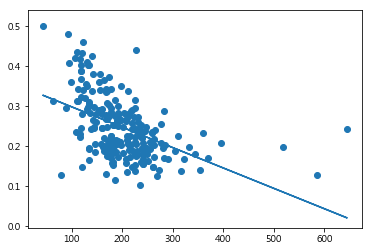

In [46]:
#ploty와 동일한 회귀식이 그려졌는지 확인 -생략 가능
plt.scatter(x,y)
plt.plot(x, slope*np.array(x)+intercept, '-')
plt.show()

In [47]:
print(stats.linregress(x,y))
print('Rsquared=',stats.linregress(x,y)[2]**2)

LinregressResult(slope=-0.0005086438466673878, intercept=0.34861883415055994, rvalue=-0.4803094510309036, pvalue=1.912149547896265e-14, stderr=6.206079275199412e-05)
Rsquared= 0.230697168749608


In [48]:
#전체시군구 분포
회귀식위 = 0
회귀식아래 = 0
for i in range(len(y)):
    if y[i]>=y_pred[i]:
        회귀식위 +=1
    else:
        회귀식아래 +=1

print(f'[수]\n전체:\t\t{len(y)}개\n회귀식 위:\t{회귀식위}개\n회귀식 아래:\t{회귀식아래}개\n')
print(f'[비율]\n회귀식 위:\t{회귀식위/len(y)}\n회귀식 아래:\t{회귀식아래/len(y)}')

[수]
전체:		226개
회귀식 위:	108개
회귀식 아래:	118개

[비율]
회귀식 위:	0.4778761061946903
회귀식 아래:	0.5221238938053098


In [49]:
#타겟팅시군구 분포
    #group2인애들만 x,y,y_pred얻어 갯수를 센다.
#타겟팅그룹만 슬라이싱
group2 = sigungu_nxy.loc[sigungu_nxy.group2==1]
x = group2['교통사고 발생건수'].tolist()
y = group2['음주교통사고 발생비율'].tolist()
y_pred = []
for i in range(len(x)):
    y_pred.append(slope*np.array(x[i])+intercept)

In [50]:
#회귀식기준 위아래 갯수세기
회귀식위 = 0
회귀식아래 = 0
for i in range(len(y)):
    if y[i]>=y_pred[i]:
        회귀식위 +=1
    else:
        회귀식아래 +=1

print(f'[수]\n전체:\t\t{len(y)}개\n회귀식 위:\t{회귀식위}개\n회귀식 아래:\t{회귀식아래}개\n')
print(f'[비율]\n회귀식 위:\t{회귀식위/len(y)}\n회귀식 아래:\t{회귀식아래/len(y)}')

[수]
전체:		40개
회귀식 위:	26개
회귀식 아래:	14개

[비율]
회귀식 위:	0.65
회귀식 아래:	0.35


# 함수로 packin

In [51]:
def total_regression(x_,y_, totaldf,groupdf):
    #전체에 대한 xy
    x = totaldf[x_].tolist()
    y = totaldf[y_].tolist()
    #전체에 대한 회귀식생성
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    #회귀식그리고 지표출력
    plt.scatter(x,y)
    plt.plot(x, slope*np.array(x)+intercept, '-')
    plt.show()    
    print(stats.linregress(x,y))
    print('Rsquared=',stats.linregress(x,y)[2]**2)
        #group에 포함되는 xy
    x = groupdf[x_].tolist()
    y = groupdf[y_].tolist()
    y_pred = []
    for i in range(len(x)):
        y_pred.append(slope*np.array(x[i])+intercept)
    회귀식위 = 0
    회귀식아래 = 0
    for i in range(len(y)):
        if y[i]>=y_pred[i]:
            회귀식위 +=1
        else:
            회귀식아래 +=1
    print(f'[수]\n전체:\t\t{len(y)}개\n회귀식 위:\t{회귀식위}개\n회귀식 아래:\t{회귀식아래}개\n')
    print(f'[비율]\n회귀식 위:\t{회귀식위/len(y)}\n회귀식 아래:\t{회귀식아래/len(y)}')

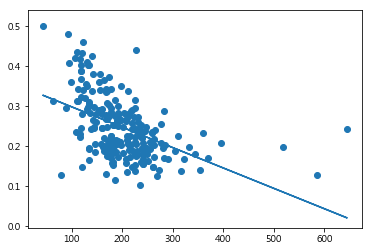

LinregressResult(slope=-0.0005086438466673878, intercept=0.34861883415055994, rvalue=-0.4803094510309036, pvalue=1.912149547896265e-14, stderr=6.206079275199412e-05)
Rsquared= 0.230697168749608
[수]
전체:		40개
회귀식 위:	26개
회귀식 아래:	14개

[비율]
회귀식 위:	0.65
회귀식 아래:	0.35


In [52]:
group2 = sigungu_nxy.loc[sigungu_nxy.group2==1]
total_regression(x_='교통사고 발생건수',y_='음주교통사고 발생비율', totaldf=sigungu_nxy,groupdf=group2)

# 새로운 증거 탐색중
타겟팅그룹에 대한 회귀식 : 새로운증거탐색중,,,

In [60]:
#타겟팅그룹만 슬라이싱
group2 = sigungu_nxy.loc[sigungu_nxy.group2==1]

In [61]:
#x, y, y_pred를 정의
x = group2['교통사고 발생건수'].tolist()
y = group2['음주교통사고 발생비율'].tolist()
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
y_pred = []
for i in range(len(x)):
    y_pred.append(slope*np.array(x[i])+intercept)

In [62]:
#혹은 stats의
print(stats.linregress(x,y))
print('Rsquared=',stats.linregress(x,y)[2]**2)

LinregressResult(slope=-0.0002967229305868617, intercept=0.3297128454821275, rvalue=-0.4194288067458442, pvalue=0.0070585286237591326, stderr=0.0001041803004274121)
Rsquared= 0.17592052392824273


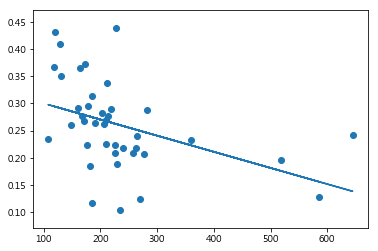

In [63]:
#ploty와 동일한 회귀식이 그려졌는지 확인 -생략 가능
plt.scatter(x,y)
plt.plot(x, slope*np.array(x)+intercept, '-')
plt.show()

In [64]:
#2)회귀식 위아래로 갯수세기
#회귀식기준 위아래 갯수세기
회귀식위 = 0
회귀식아래 = 0
for i in range(len(y)):
    if y[i]>=y_pred[i]:
        회귀식위 +=1
    else:
        회귀식아래 +=1

print(f'[수]\n전체:\t\t{len(y)}개\n회귀식 위:\t{회귀식위}개\n회귀식 아래:\t{회귀식아래}개\n')
print(f'[비율]\n회귀식 위:\t{회귀식위/len(y)}\n회귀식 아래:\t{회귀식아래/len(y)}')

[수]
전체:		40개
회귀식 위:	19개
회귀식 아래:	21개

[비율]
회귀식 위:	0.475
회귀식 아래:	0.525


In [65]:
#ols로 설명력 확인
#띄어쓰기 있으면 오류남
import statsmodels.api as sm
group2.rename(columns={'음주교통사고 발생비율':'음주교통사고발생비율',
              '제조업 업체수':'제조업업체수',
              '제조업 종사자수':'제조업종사자수'}, inplace=True)
reg = sm.OLS.from_formula("음주교통사고발생비율 ~ 제조업업체수+제조업종사자수", group2).fit()
reg.summary()

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             음주교통사고발생비율   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     2.818
Date:                Sat, 30 Nov 2019   Prob (F-statistic):             0.0726
Time:                        18:05:21   Log-Likelihood:                 47.186
No. Observations:                  40   AIC:                            -88.37
Df Residuals:                      37   BIC:                            -83.31
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2946      0.019     15.733      0.000       0.257       0.333
제조업업체수        -0.0001      0.000     -1.059      0.296      -0.000       0.000
제조업종사자수    -1.092e-05   1.14e-05     -0.961      0.343   -3.39e-05    1.21e-05
==============================================================================
Omnibus:                        2.285   Durbin-Watson:                   1.573
Prob(Omnibus):                  0.319   Jarque-Bera (JB):                1.301
Skew:                           0.386   Prob(JB):                        0.522
Kurtosis:                       3.429   Cond. No.                     3.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
#USING OLS
test = sigungu_nxy.loc[:,['음주교통사고 발생비율','교통사고 발생건수','제조업 업체수','제조업 종사자수']]
test.columns=['음주교통사고발생비율','교통사고발생건수','제조업업체수','제조업종사자수']
import statsmodels.api as sm
reg = sm.OLS.from_formula("음주교통사고발생비율 ~ 교통사고발생건수", test).fit()
reg.summary()
#reg.params : 음주교통사고발생비율 = -0.000509*교통사고발생건수+0.348619
reg = sm.OLS.from_formula("음주교통사고발생비율 ~ 제조업업체수+제조업종사자수", test).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             음주교통사고발생비율   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.813
Date:                Sat, 30 Nov 2019   Prob (F-statistic):             0.0622
Time:                        17:22:30   Log-Likelihood:                 260.84
No. Observations:                 226   AIC:                            -515.7
Df Residuals:                     223   BIC:                            -505.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2561      0.007     34.735      0.000       0.242       0.271
제조업업체수      5.058e-05   8.38e-05      0.603      0.547      -0.000       0.000
제조업종사자수    -1.581e-05   7.67e-06     -2.061      0.040   -3.09e-05   -6.93e-07
==============================================================================
Omnibus:                       21.316   Durbin-Watson:                   1.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.543
Skew:                           0.791   Prob(JB):                     4.68e-06
Kurtosis:                       3.321   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""